In [1]:
import os
import helpers
import cv2
import imutils
import time
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A = os.walk("extracted_letter_images")

In [3]:
dirA = list(A)

In [4]:
labels = dirA[0][1]

In [5]:
np.asarray(labels) #.tofile("labels")

array(['3', 'N', 'D', '8', 'S', 'W', 'P', '7', 'K', 'J', '4', '2', 'Y',
       'H', 'A', 'G', 'Q', 'C', 'E', 'B', 'T', '5', 'U', 'V', 'I', 'X',
       '6', 'Z', 'F', 'R', 'M'], dtype='<U1')

In [6]:
Dir = [(len(carpeta[2]),carpeta[0]) for carpeta in dirA[1:]]

In [7]:
minN = sorted(Dir)[0][0]

## Ajustando para que todos tengan el mismo tamaño

In [16]:
def resize_to_fit(image, width, height):
    """
    A helper function to resize an image to fit within a given size
    :param image: image to resize
    :param width: desired width in pixels
    :param height: desired height in pixels
    :return: the resized image
    """
    # grab the dimensions of the image, then initialize
    # the padding values
    (h, w) = image.shape[:2]

    # if the width is greater than the height then resize along
    # the width
    if w > h:
        image = imutils.resize(image, width=width)

    # otherwise, the height is greater than the width so resize
    # along the height
    else:
        image = imutils.resize(image, height=height)

    # determine the padding values for the width and height to
    # obtain the target dimensions
    padW = int((width - image.shape[1]) / 2.0)
    padH = int((height - image.shape[0]) / 2.0)

    # pad the image then apply one more resizing to handle any
    # rounding issues
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW,
        cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))

    # return the pre-processed image
    return image

In [17]:
def changeContrast(img , b= 5. ,  c = 700.):
    return cv2.addWeighted(img, 1. + c/127., img, 0, b-c)

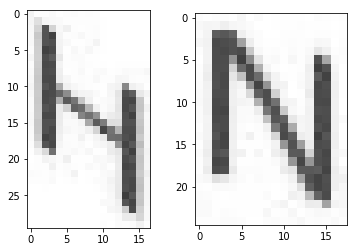

In [18]:
B =cv2.imread("extracted_letter_images/N/000002.png")
C =cv2.imread("extracted_letter_images/H/000002.png")
C1 = cv2.cvtColor(C, cv2.COLOR_BGR2RGB)
B1 = cv2.cvtColor(B, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2)
ax[0].imshow(C1)
ax[1].imshow(B1)

In [19]:
def grafLiLj(Li,Lj):
    B =cv2.imread(Lj)
    C =cv2.imread(Li)
    fig, ax = plt.subplots(2,2)
    #Con cambio de contraste
    Bp = resize_to_fit(changeContrast(B),20,20)
    Cp = resize_to_fit(changeContrast(C),20,20)
    C1 = cv2.cvtColor(Cp, cv2.COLOR_BGR2RGB)
    B1 = cv2.cvtColor(Bp, cv2.COLOR_BGR2RGB)
    ax[0,0].imshow(C1)
    ax[0,1].imshow(B1)
    #Sin cambio de constraste
    ax[1,0].imshow(cv2.cvtColor(resize_to_fit(C,20,20), cv2.COLOR_BGR2RGB))
    ax[1,1].imshow(cv2.cvtColor(resize_to_fit(B,20,20), cv2.COLOR_BGR2RGB))

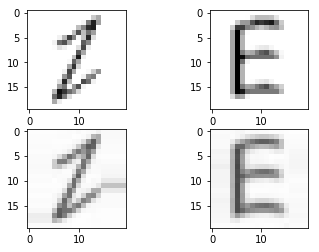

In [15]:
grafLiLj("extracted_letter_images/Z/000105.png","extracted_letter_images/E/000004.png")

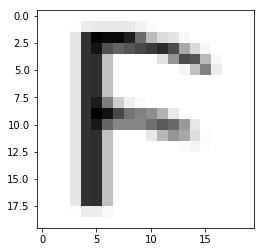

In [12]:
Bp = resize_to_fit(changeContrast(cv2.cvtColor(B, cv2.COLOR_BGR2RGB)),20,20)
plt.imshow(Bp)

In [13]:
Bp.shape

(20, 20, 3)

In [14]:
type(Bp)

numpy.ndarray

In [15]:
L = (Bp[:,:,0])

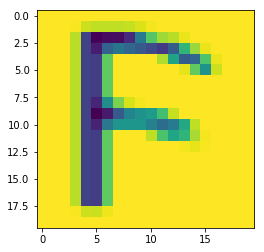

In [16]:
plt.imshow(L)

In [17]:
L.flatten()

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 236, 231,
       231, 231, 233, 242, 251, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 229,  50,   2,   8,   9,  30, 106, 188, 219,
       228, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 229,  50,
        20,  80,  99,  86,  72,  59,  43,  75, 167, 217, 248, 255, 255,
       255, 255, 255, 255, 255, 229,  50,  46, 193, 255, 255, 255, 255,
       225, 147,  75,  84, 185, 248, 255, 255, 255, 255, 255, 255, 229,
        50,  46, 193, 255, 255, 255, 255, 255, 255, 246, 193, 130, 236,
       255, 255, 255, 255, 255, 255, 229,  50,  46, 193, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       229,  50,  46, 193, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 229,  50,  26, 125, 205, 240,
       252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

## Extrayendo un número balanceado de elementos

In [19]:
rutas = []
for Letter in dirA[1:]:
    dirs = np.random.choice(Letter[2],size=500,replace=False)
    rutas.append((Letter[0], dirs.copy()))

In [20]:
type(rutas[1][1])

numpy.ndarray

In [21]:
paths = []
for letter in rutas:
    paths += [ letter[0] +"/"+ i  for i in letter[1]]

In [22]:
len(paths)

15500

In [23]:
paths = np.asarray(paths)

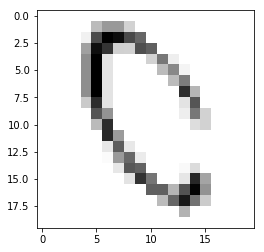

In [24]:
path = np.random.choice(paths)
X =cv2.imread(path)
X = resize_to_fit(changeContrast(cv2.cvtColor(X, cv2.COLOR_BGR2RGB)),20,20)
plt.imshow(X)

In [25]:
Y = []
for path in paths:
    X =cv2.imread(path)
    X = resize_to_fit(changeContrast(cv2.cvtColor(X, cv2.COLOR_BGR2RGB)),20,20)
    X = X[:,:,0].flatten()
    Y.append(X)

In [26]:
Y = np.asarray(Y)

In [27]:
Y.shape

(15500, 400)

In [31]:
Salida = Y[:1000].copy()

In [35]:
Salida.tofile("digits",sep=",")

In [37]:
Y.tofile("allABC",sep=",")